In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("mymoviedb.csv",lineterminator="\n")

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [5]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [6]:
df["Release_Date"]=pd.to_datetime(df["Release_Date"])
print(df["Release_Date"].dtype)

datetime64[ns]


In [7]:
df["Release_Date"]= df["Release_Date"].dt.year

In [8]:
df["Release_Date"].dtype

dtype('int32')

In [9]:
df = df.drop(["Overview","Original_Language","Poster_Url"],axis=1)

In [10]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [11]:
stats = df['Vote_Average'].describe()

q1 = stats['25%']
q2 = stats['50%']
q3 = stats['75%']

# Categorization based on describe()
def categorize_vote(vote):
    if vote >= q3:
        return 'Popular'
    elif vote >= q2:
        return 'Average'
    elif vote >= q1:
        return 'Below Average'
    else:
        return 'Not Popular'

# Apply category
df['Category'] = df['Vote_Average'].apply(categorize_vote)

In [12]:
df.head(20)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",Popular
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",Popular
2,2022,No Exit,2618.087,122,6.3,Thriller,Below Average
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",Popular
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",Average
5,2022,The Commando,1750.484,33,6.6,"Action, Crime, Thriller",Average
6,2022,Scream,1675.161,821,6.8,"Horror, Mystery, Thriller",Average
7,2022,Kimi,1601.782,206,6.3,Thriller,Below Average
8,2022,Fistful of Vengeance,1594.013,114,5.3,"Action, Crime, Fantasy",Not Popular
9,2021,Eternals,1537.406,4726,7.2,Science Fiction,Popular


In [13]:
df["Category"].unique()

array(['Popular', 'Below Average', 'Average', 'Not Popular'], dtype=object)

In [14]:
df = df.drop(["Vote_Average"],axis=1)

In [15]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Genre,Category
0,2021,Spider-Man: No Way Home,5083.954,8940,"Action, Adventure, Science Fiction",Popular
1,2022,The Batman,3827.658,1151,"Crime, Mystery, Thriller",Popular
2,2022,No Exit,2618.087,122,Thriller,Below Average
3,2021,Encanto,2402.201,5076,"Animation, Comedy, Family, Fantasy",Popular
4,2021,The King's Man,1895.511,1793,"Action, Adventure, Thriller, War",Average


In [16]:
category_counts = df['Category'].value_counts()
print(category_counts)

Category
Popular          2840
Average          2449
Below Average    2331
Not Popular      2207
Name: count, dtype: int64


In [17]:
df.dropna(inplace= True)

In [18]:
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Genre           0
Category        0
dtype: int64

In [19]:
df["Genre"]=df["Genre"].str.split(", ")

In [20]:
df= df.explode("Genre").reset_index(drop=True)

In [21]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Genre,Category
0,2021,Spider-Man: No Way Home,5083.954,8940,Action,Popular
1,2021,Spider-Man: No Way Home,5083.954,8940,Adventure,Popular
2,2021,Spider-Man: No Way Home,5083.954,8940,Science Fiction,Popular
3,2022,The Batman,3827.658,1151,Crime,Popular
4,2022,The Batman,3827.658,1151,Mystery,Popular


In [22]:
# Agar aapne categorize_vote apply kar diya tha drop karne se pehle:
bottom_movies = df[df['Category'] == 'Popular']

# Result dekhen
print(bottom_movies)

       Release_Date                    Title  Popularity  Vote_Count  \
0              2021  Spider-Man: No Way Home    5083.954        8940   
1              2021  Spider-Man: No Way Home    5083.954        8940   
2              2021  Spider-Man: No Way Home    5083.954        8940   
3              2022               The Batman    3827.658        1151   
4              2022               The Batman    3827.658        1151   
...             ...                      ...         ...         ...   
25781          1973                 Badlands      13.357         896   
25782          1973                 Badlands      13.357         896   
25790          1984                  Threads      13.354         186   
25791          1984                  Threads      13.354         186   
25792          1984                  Threads      13.354         186   

                 Genre Category  
0               Action  Popular  
1            Adventure  Popular  
2      Science Fiction  Popular  

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Release_Date  25793 non-null  int32  
 1   Title         25793 non-null  object 
 2   Popularity    25793 non-null  float64
 3   Vote_Count    25793 non-null  int64  
 4   Genre         25793 non-null  object 
 5   Category      25793 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 1.1+ MB


In [24]:
df.nunique()

Release_Date     102
Title           9513
Popularity      8160
Vote_Count      3266
Genre             19
Category           4
dtype: int64

In [25]:
df["Genre"].describe()


count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

# Visualization for Which Movies Got Highest Genres

C:\Users\DELL\AppData\Local\Temp\ipykernel_9940\1167370396.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_exploded, y='Genre', order=df_exploded['Genre'].value_counts().index, palette='viridis')


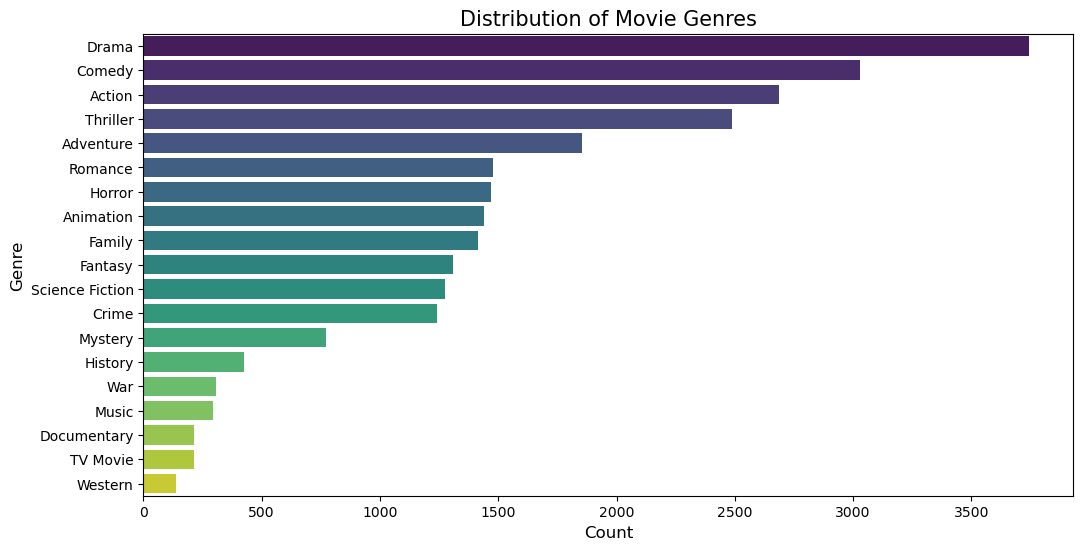

In [26]:
# 1. Expand the lists in the 'Genre' column so each genre gets its own row
df_exploded = df.explode('Genre')

# 2. Set the visual style and figure size
plt.figure(figsize=(12, 6))

# 3. Create a horizontal count plot
# 'order' ensures the most frequent genre (Drama) is at the top
sns.countplot(data=df_exploded, y='Genre', order=df_exploded['Genre'].value_counts().index, palette='viridis')

# 4. Add titles and axis labels
plt.title('Distribution of Movie Genres', fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)

# 5. Display the plot
plt.show()

# Visualization for Catgeory Wise

C:\Users\DELL\AppData\Local\Temp\ipykernel_9940\1284018328.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


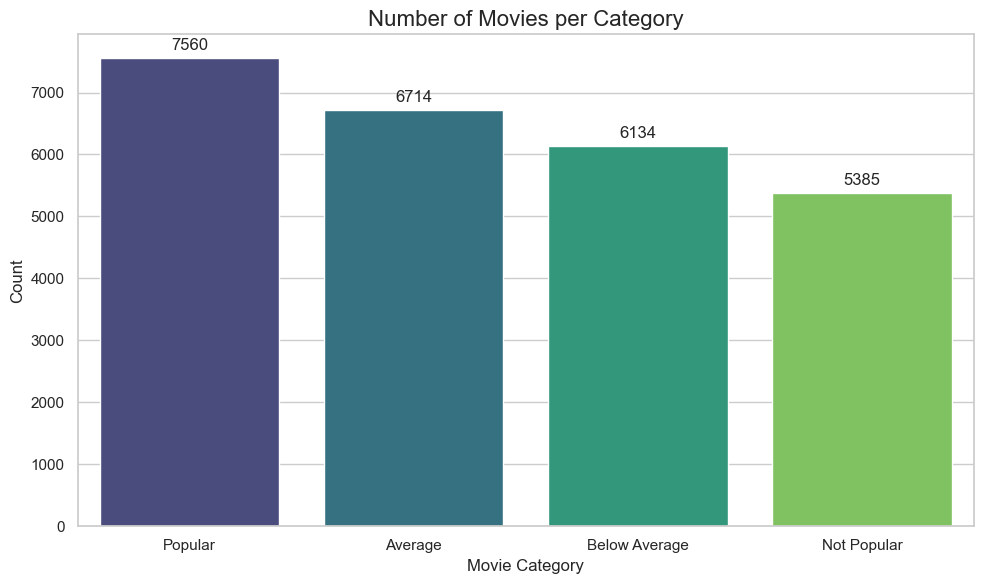

In [27]:
# 1. Set the visual style and figure size
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# 2. Define the logical order of categories for the x-axis
category_order = ['Popular', 'Average', 'Below Average', 'Not Popular']

# 3. Create the count plot
# We use the 'Category' column we created earlier
ax = sns.countplot(
    data=df, 
    x='Category', 
    order=category_order, 
    palette='viridis'
)

# 4. Add labels and a title
plt.title('Number of Movies per Category', fontsize=16)
plt.xlabel('Movie Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

# 5. Optional: Add the exact count on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

# 6. Display the plot
plt.tight_layout()
plt.show()

# Highest Priority Genres

C:\Users\DELL\AppData\Local\Temp\ipykernel_9940\2195306629.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


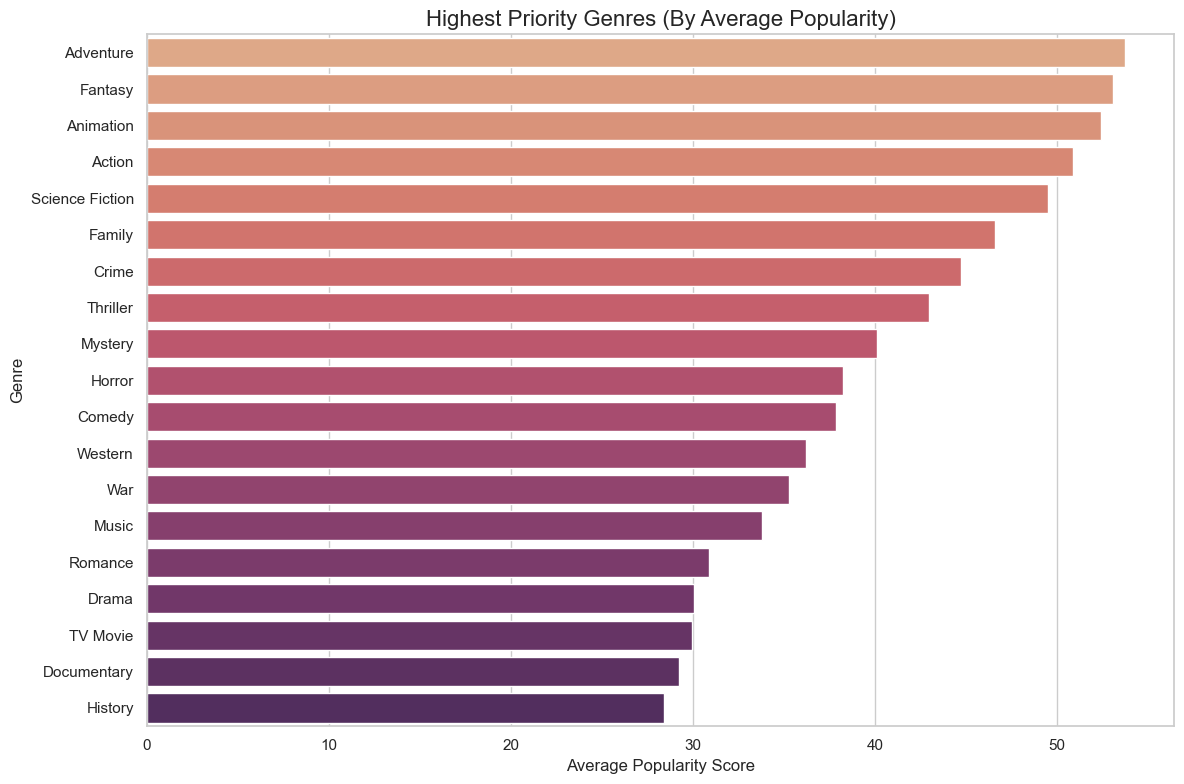

In [28]:
# 1. Set the style and figure size
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))

# 2. Create a Bar Plot showing Average Popularity per Genre
# This will identify which genres have the 'highest priority' based on Popularity
sns.barplot(
    data=df, 
    x='Popularity', 
    y='Genre', 
    estimator='mean', # Use 'mean' for priority or 'max' for the single most popular movie
    errorbar=None,    # Removes the uncertainty lines for a cleaner look
    palette='flare',
    order=df.groupby('Genre')['Popularity'].mean().sort_values(ascending=False).index
)

# 3. Add labels and title
plt.title('Highest Priority Genres (By Average Popularity)', fontsize=16)
plt.xlabel('Average Popularity Score', fontsize=12)
plt.ylabel('Genre', fontsize=12)

# 4. Display the plot
plt.tight_layout()
plt.show()

# Lowest Priority Movie with its Genre

In [29]:
df[df["Popularity"] == df["Popularity"].max()]

,Release_Date,Title,Popularity,Vote_Count,Genre,Category
0,2021,Spider-Man: No Way Home,5083.954,8940,Action,Popular
1,2021,Spider-Man: No Way Home,5083.954,8940,Adventure,Popular
2,2021,Spider-Man: No Way Home,5083.954,8940,Science Fiction,Popular


# Lowest Priority Movie with its Genre

In [30]:
df[df["Popularity"] == df["Popularity"].min()]

,Release_Date,Title,Popularity,Vote_Count,Genre,Category
25787,2021,The United States vs. Billie Holiday,13.354,152,Music,Average
25788,2021,The United States vs. Billie Holiday,13.354,152,Drama,Average
25789,2021,The United States vs. Billie Holiday,13.354,152,History,Average
25790,1984,Threads,13.354,186,War,Popular
25791,1984,Threads,13.354,186,Drama,Popular
25792,1984,Threads,13.354,186,Science Fiction,Popular


# Most Movies Release in Years

C:\Users\DELL\AppData\Local\Temp\ipykernel_9940\3231461741.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


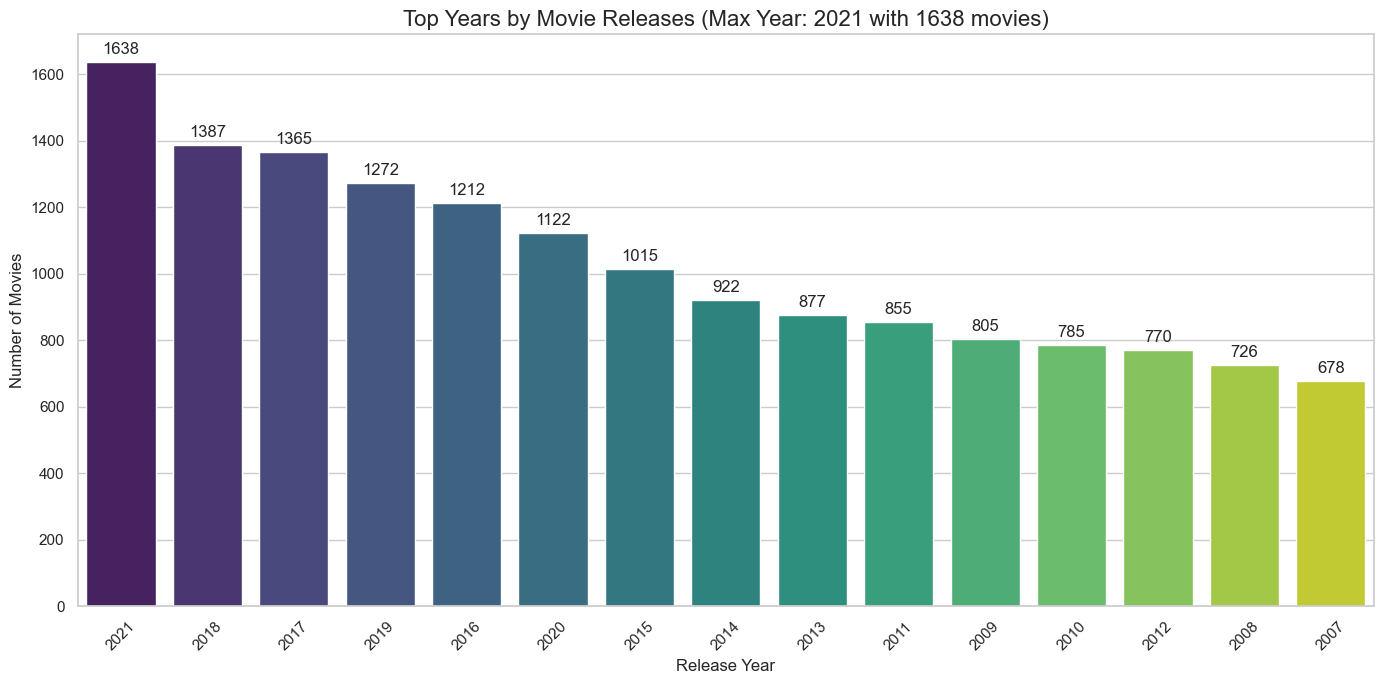

In [31]:
# 1. Set the visual style and figure size
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7))

# 2. Identify the year with the maximum releases for the title
max_year = df['Release_Date'].value_counts().idxmax()
max_count = df['Release_Date'].value_counts().max()

# 3. Create the count plot
# We order by value_counts().index to show the years with the most movies first
ax = sns.countplot(
    data=df, 
    x='Release_Date', 
    palette='viridis',
    order=df['Release_Date'].value_counts().iloc[:15].index  # Showing top 15 years
)

# 4. Add titles and labels
plt.title(f'Top Years by Movie Releases (Max Year: {max_year} with {max_count} movies)', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45)

# 5. Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.tight_layout()
plt.show()